<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine Tuning


## Helper Functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-06 13:29:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-06 13:29:59 (72.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
## Import helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Get Data

Im going to use keras.applications for the models

In [3]:
# Get 10 % of training data\
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-09-06 13:30:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   154MB/s    in 1.0s    

2022-09-06 13:30:03 (154 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
unzip_data('10_food_classes_10_percent.zip')

In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [6]:
# Create training and test dir paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [7]:
import tensorflow as tf


In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
#for images, labels in train_data_10_percent.take(1):
  #print(images,labels)

## Build the model using KERAS FUNCTIONAL API

# Model 0: Transfer Learning model using Keras Functional API

In [10]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (the pre trained weights will be freezed)
base_model.trainable = False

# 3. Create the input
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# 4. If using a model like ResNet50V2 need to normalize inputs (not on EfficientNet's beacause its already have a rescaling layer)
# x = tf.keras.layers.exprimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing input: {x.shape}")

# 6. Average Pool the outputs (aggreagte all the most important information)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_layer')(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the ouput activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine inputs with the ouputs
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent, batch_size=BATCH_SIZE, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing input: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220906-133014
Epoch 1/5
24/24 [==============================] - 27s 417ms/step - loss: 1.8600 - accuracy: 0.4307 - val_loss: 1.3042 - val_accuracy: 0.7244
Epoch 2/5
24/24 [==============================] - 8s 332ms/step - loss: 1.1274 - accuracy: 0.7520 - val_loss: 0.9091 - val_accuracy: 0.8020
Epoch 3/5
24/24 [==============================] - 8s 316ms/step - loss: 0.8287 - accuracy: 0.8240 - val_loss: 0.7392 - val_accuracy: 0.8236
Epoch 4/5
24/24 [==============================] - 8s 315ms/step - loss: 0.6781 - accuracy: 0.8507 - val_loss: 0.6519 - val_accuracy: 0.8396
Epoch 5/5
24/24 [==============================] - 8s 318ms/step - loss: 0.5937 - accuracy: 0.8613 - val_loss: 0.6049 - val_accuracy: 0.8408


In [11]:
# Evalute
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6049 - accuracy: 0.8408


[0.6048533320426941, 0.8407999873161316]

In [12]:
# Check the layers in our model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
# Base model summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
# Summary of whole model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


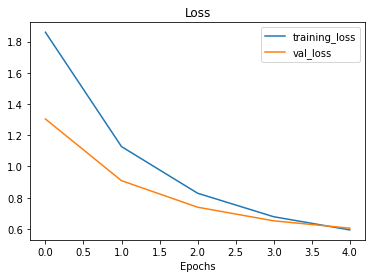

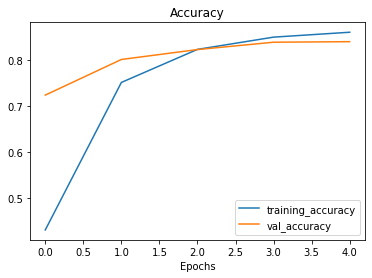

In [15]:
plot_loss_curves(history_0)

### Getting a feature vector from  a trined model (Shape after GlobalAveragePooling2D: (None, 1280))

Demostrate the GlobalAveragePooling2D layer, it transofrm a 4D tensor in a 2D tensor. After the model go through the base_model it has shape of (None,7,7,1280) after GlobalVaregePooling (None, 1280)


In [16]:
# Define the input shape
input_shape = (1,4,4,3)
# Create random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"random input tensor\n {input_tensor}\n")
# Pass the random tensor through a GlobalAveragePooling2D
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"global_average_pooled_tensor \n {global_average_pooled_tensor}\n")
# Check the shape
print(f"shape input tensor\n {input_tensor.shape}\n")
print(f"shape global_average_pooled_tensor tensor\n {global_average_pooled_tensor.shape}\n")

random input tensor
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

global_average_pooled_tensor 
 [[-0.09368646 -0.45840448 -0.2885598 ]]

shape input tensor
 (1, 4, 4, 3)

shape global_average_pooled_tensor tensor
 (1, 3)



### Running a series of transfer learnign experiments

1. `model_1` - use feature extraction with 1 %^of training data with data augmentation
2. `model_2` - use feature extraction with 10% and data augmentation
3. `model_3` - use fine tuning of 10% data and data augmentation
4. `model_4` - ude fine tuning on 100 % data and data augmentation

Using for all the expriments the same test set to ensure consistency across evaluation metrics


### Download and unzip  data for model_1

In [17]:
# Download and unzip  data for model_1
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2022-09-06 13:31:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   257MB/s    in 0.5s    

2022-09-06 13:31:41 (257 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [18]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'

In [19]:
# Create training and test dir
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [20]:
# Setup data loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data augmentation

To add data augmentation we can use
 
 * `tf.keras.exprimental.preprocessing()`

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [41]:
# Create Data augmentation with horizontal flipping, rotations, zooms ecc
data_augmentation =  keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescaling(1./255) # Keep for ResNet but not for efficientNet
], name='data_augmentation')

10_food_classes_1_percent/train/pizza
3478964.jpg


Text(0.5, 1.0, 'Augmented image from class pizza')

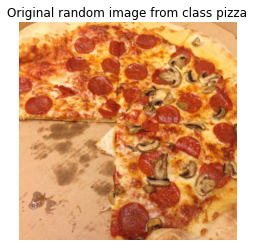

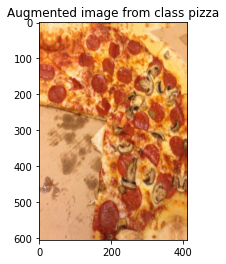

In [36]:
# Visualize Data AUgmentation layer and data (view a random image and its augmented version)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class

print(target_dir)
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
print(random_image)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

# Read and plot AUgmented image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img)
plt.title(f"Augmented image from class {target_class}")

## Build Model 1 with data Augmentation (Feature Extraction) 1% Data

In [42]:
# Setup input shape, freeze base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape=input_shape, name='input_layer')
# Add data augmentation Sequential layer
x = data_augmentation(inputs)
# Passing data augmentations to the base_model
x = base_model(x, training=False)

# Output
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
# Dense Layer
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model using input and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the model
history_model_1 = model_1.fit(train_data_1_percent, epochs=5, steps_per_epoch=len(train_data_1_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name='transfer_learning', experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220906-135709
Epoch 1/5
3/3 [==============================] - 14s 4s/step - loss: 2.3298 - accuracy: 0.0714 - val_loss: 2.1955 - val_accuracy: 0.2016
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.0637 - accuracy: 0.3143 - val_loss: 2.0759 - val_accuracy: 0.3108
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.8497 - accuracy: 0.4857 - val_loss: 1.9724 - val_accuracy: 0.3888
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7129 - accuracy: 0.5571 - val_loss: 1.8805 - val_accuracy: 0.4556
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6047 - accuracy: 0.6000 - val_loss: 1.7953 - val_accuracy: 0.5024


In [44]:
# Model 1 summary
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [46]:
# Evaluate on ful test dataset
result_1_percent_data_aug = model_1.evaluate(test_data)
result_1_percent_data_aug

79/79 [==============================] - 6s 74ms/step - loss: 1.7953 - accuracy: 0.5024


[1.7953062057495117, 0.5023999810218811]

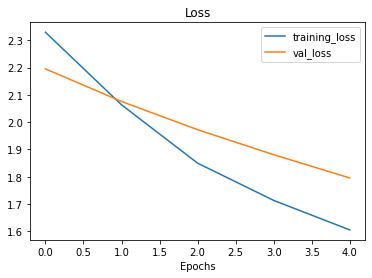

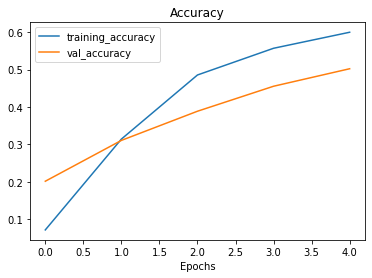

In [47]:
plot_loss_curves(history_model_1)

## Model 2, 10 percent data, data agumentation and Feature extraction

In [48]:
# Get 10 % of the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')


--2022-09-06 14:12:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   248MB/s    in 0.6s    

2022-09-06 14:12:28 (248 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [49]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [50]:
# Setting train dir
train_10_percent_dir = '10_food_classes_10_percent/train'
# The test data is test_data, always use the same for all the models

In [54]:
# Setting data loaders
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_10_percent_dir, label_mode='categorical', image_size=IMAGE_SHAPE, batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.


In [58]:
# Setting up data augmentation Sequential layer

data_augmentation = keras.Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
], name='augmentation_layer')

In [60]:
# Setting the model
INPUT_SHAPE = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create the input layer
inputs = layers.Input(shape=INPUT_SHAPE, name='input_layer')

# Create the data augmentation layer

x = data_augmentation(inputs)

# Extend base model

x = base_model(x, training=False)

# Pooling layer

x = layers.GlobalAveragePooling2D(name='global_average_layer')(x)

# Dense

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Build the model

model_2 = keras.Model(inputs,outputs)

# Compile

model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

# Fit

history_model_2 = model_2.fit(train_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name='transfer_learning', experiment_name='model_2_10_percent_aug')])

Epoch 1/5
24/24 [==============================] - 23s 690ms/step - loss: 1.9821 - accuracy: 0.3600 - val_loss: 1.4904 - val_accuracy: 0.6112
Epoch 2/5
24/24 [==============================] - 14s 556ms/step - loss: 1.3396 - accuracy: 0.6827 - val_loss: 1.0669 - val_accuracy: 0.7508
Epoch 3/5
24/24 [==============================] - 13s 516ms/step - loss: 1.0537 - accuracy: 0.7467 - val_loss: 0.8684 - val_accuracy: 0.7844
Epoch 4/5
24/24 [==============================] - 14s 595ms/step - loss: 0.9046 - accuracy: 0.7613 - val_loss: 0.7590 - val_accuracy: 0.8000
Epoch 5/5
24/24 [==============================] - 15s 594ms/step - loss: 0.7999 - accuracy: 0.7973 - val_loss: 0.7021 - val_accuracy: 0.8016
